In [1]:
import os
import re
from collections import Counter
import math
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Legion/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
d5 = "OpenAI is an artificial intelligence research laboratory consisting of the for-profit corporation OpenAI LP and its parent company, the non-profit OpenAI Inc. It aims to conduct research in a way that is safe and beneficial to humanity, and works towards developing AI that is both reliable and trustworthy. OpenAI has developed several AI models, including the GPT series of language models, which can perform tasks such as language translation, text summarization, and question answering. The GPT-3, which has 175 billion parameters, is the largest language model ever developed and has been used in a wide range of applications, from generating news articles to composing music."

d6 = "A chatbot is a computer program that simulates conversation with human users, especially over the internet. Chatbots can be programmed to respond to specific queries or perform certain actions, such as booking a flight or ordering a pizza. There are several types of chatbots, including rule-based chatbots, which are programmed to respond to specific keywords or phrases, and machine learning chatbots, which can learn from previous interactions and improve their responses over time. Chatbots are increasingly being used by businesses to provide customer support, answer frequently asked questions, and automate certain tasks."

d7 = "All the wood Esau Wood saw, Esau Wood would saw. In other words, all the wood Wood saw, Esau sought to saw. One day Wood's wood-saw would saw no wood. Hence all the wood Wood would saw was not the wood Wood would saw if Wood's wood-saw would saw wood."

d8 = "OpenAI is an artificial intelligence research laboratory consisting of the for-profit corporation OpenAI LP and its parent company, the non-profit OpenAI Inc. Their research is aimed at creating advanced AI systems that can assist humans in solving complex problems. Recently, they have been experimenting with quantum computing and neural network models to achieve even greater levels of artificial intelligence. Additionally, they have been working on a project to create a self-driving car that can navigate city streets and highways autonomously, without any human input. OpenAI's work is cutting-edge and has the potential to revolutionize many industries."

d9 = "Chatbot development has become a very important task for businesses to engage and retain customers on their websites or mobile applications. With the rise of social media and messaging apps, chatbots have become a popular way for businesses to provide customer support and interact with their customers in real-time. Many companies have started using chatbots to automate their customer service processes, allowing them to provide 24/7 support without the need for human intervention. However, creating an effective chatbot requires a lot of time and effort, as it needs to be able to understand and respond to a wide range of customer queries and issues."

d10 = "A peck of pickled peppers Peter Piper picked. If Peter Piper picked a peck of pickled peppers, Where's the peck of pickled peppers Peter Piper picked?"

d11 = "The benefits of meditation have been extensively researched and documented, including improved mental and physical health, reduced stress and anxiety, and increased creativity and productivity. It is a practice that has been around for thousands of years and is used by millions of people around the world. Meditation involves focusing the mind on a specific object, such as the breath, and observing thoughts and sensations without judgment. By doing this, we can develop greater awareness and control over our thoughts and emotions, leading to a greater sense of well-being and happiness."
d12 = "The history of the automobile dates back to the 19th century, with early prototypes powered by steam engines or gasoline combustion engines. Over the years, the design and technology of automobiles have evolved significantly, with the introduction of electric and hybrid cars, as well as advanced safety features such as automatic braking and lane departure warning systems. In recent years, self-driving cars have become a hot topic, with many companies investing heavily in research and development. The future of the automobile industry is exciting, with the potential for even greater innovation and advancements in technology."

d13 = "The importance of physical exercise for overall health and well-being cannot be overstated, with benefits including improved cardiovascular health, increased strength and endurance, and reduced risk of chronic disease. Regular exercise is essential for maintaining a healthy weight and preventing obesity, which is a major risk factor for many chronic health conditions. Additionally, exercise is an effective way to reduce stress and anxiety, improve mood, and boost cognitive function. Whether it's through sports, gym workouts, or outdoor activities, everyone can benefit from regular physical activity."

d14 = "The latest fashion trends for summer 2023 include bright colors, bold patterns, and relaxed fits, with sustainable and eco-friendly materials becoming increasingly popular among designers and consumers alike. Fashion designers are increasingly focused on creating sustainable and ethical fashion, using recycled materials and minimizing waste in their production processes."

d15 = "The quick brown fox jumps over the lazy dog.\nThe quick brown fox jumps over the lazy dog.\nThe quick brown fox jumps over the lazy dog."

d16 = "To be or not to be, that is the question.\nWhether 'tis nobler in the mind to suffer\nThe slings and arrows of outrageous fortune,\nOr to take arms against a sea of troubles."

d17 = "I wandered lonely as a cloud\nThat floats on high o'er vales and hills,\nWhen all at once I saw a crowd,\nA host, of golden daffodils;"
d18 = "Water, water, everywhere,\nAnd all the boards did shrink;\nWater, water, everywhere,\nNor any drop to drink."
d19 = "Humpty Dumpty sat on a wall,\nHumpty Dumpty had a great fall.\nAll the king's horses and all the king's men\nCouldn't put Humpty together again."
d20 = "When I consider how my light is spent\nEre half my days in this dark world and wide,\nAnd that one talent which is death to hide\nLodg'd with me useless, though my soul more bent"
d21 = "The history of basketball can be traced back to the late 1800s when the game was invented by Dr. James Naismith. Since then, the game has grown in popularity and is now played all around the world. Basketball is a sport that requires speed, agility, and teamwork. It is played with two teams of five players each, who try to score points by shooting a ball through a hoop that is 10 feet high."
d22 = "Artificial intelligence is changing the way we interact with technology. From Siri and Alexa to self-driving cars and chatbots, AI is transforming many aspects of our lives. With its ability to process and analyze vast amounts of data, AI is helping to solve complex problems and improve decision-making. However, there are also concerns about the impact of AI on employment and privacy."
d23 = "The Great Barrier Reef is one of the world's most beautiful natural wonders. Located off the coast of Australia, the reef is home to a diverse array of marine life, including thousands of species of fish, sea turtles, sharks, and coral. Unfortunately, the reef is under threat from climate change, pollution, and overfishing. Efforts are underway to protect and preserve this incredible ecosystem for future generations."
d24 = "The human brain is the most complex organ in the body. It is responsible for all of our thoughts, emotions, and actions. Despite decades of research, there is still much that we don't know about the brain. However, advances in neuroscience are helping us to better understand how the brain works and how we can treat disorders such as Alzheimer's and Parkinson's disease."
d25 = "OpenAI's chatbot GPT-3 is a powerful tool for natural language processing. It has the ability to generate human-like responses to a wide range of prompts, from simple questions to complex discussions. However, as with any AI technology, there are concerns about the ethical implications of GPT-3's use, particularly in areas such as fake news and misinformation."
d26 = "The Olympics is the world's largest and most prestigious sporting event. Athletes from all around the world come together to compete in a wide range of sports, from swimming and track and field to gymnastics and basketball. The Olympics is a celebration of athletic excellence, cultural diversity, and international cooperation."

d27 = "The human genome is the complete set of genetic instructions for building and maintaining a human being. It is made up of more than three billion base pairs of DNA, which code for the proteins that make up our bodies. Understanding the human genome is key to developing new treatments for genetic disorders and diseases."

d28 = "Chatbots are becoming increasingly popular in customer service and support. They are a cost-effective way to provide 24/7 support and can handle a wide range of inquiries, from simple questions to more complex issues. However, there are also concerns about the quality of service provided by chatbots, particularly when it comes to empathy and understanding."

d29 = "The Hubble Space Telescope has revolutionized our understanding of the universe. Since its launch in 1990, it has captured stunning images of distant galaxies, stars, and planets. These images have helped us to better understand the origins of the universe and our place within it."

d30 = "OpenAI has made impressive advancements in artificial intelligence. Their latest chatbot, GPT-3, has garnered a lot of attention due to its ability to generate text that is nearly indistinguishable from that written by humans. The technology behind GPT-3 is fascinating and has the potential to revolutionize the field of natural language processing."

d31 = "As the use of chatbots becomes more widespread, there is an increasing concern about the privacy and security of users' information. OpenAI has taken steps to address these concerns with the development of their chatbot, GPT-3. GPT-3 includes built-in privacy features that ensure user data is protected, making it a safer option for businesses looking to implement chatbots."
d32= "Although GPT-3 is an impressive technology, it is not without its limitations. One major issue is the lack of diversity in the data used to train the model. This has led to instances of bias and inaccuracies in the text generated by the chatbot. As the technology continues to develop, it will be important to address these issues in order to ensure that GPT-3 can be used effectively and ethically."

d33= "The development of GPT-3 has sparked a new wave of innovation in the field of artificial intelligence. Many businesses are now exploring the use of chatbots to improve customer service and increase efficiency. GPT-3's ability to understand natural language and generate accurate responses makes it an attractive option for companies looking to implement chatbots."

d34= "OpenAI's chatbot, GPT-3, has been hailed as a major breakthrough in natural language processing. However, there are still many challenges to overcome in order to make chatbots truly conversational. One major hurdle is the ability to understand and respond to context. As the technology continues to develop, it will be interesting to see how these challenges are addressed."

d35= "The development of GPT-3 has raised important questions about the future of work. As AI becomes more advanced, there is concern that it may replace human workers in certain industries. However, many experts argue that AI will actually create new jobs and opportunities. It will be important for businesses and policymakers to consider these issues as AI continues to evolve."

d36= "One of the most impressive features of GPT-3 is its ability to complete tasks that require reasoning and logic. This has led to speculation about the potential uses of the technology beyond natural language processing. For example, GPT-3 could be used to solve complex mathematical equations or even assist in scientific research."
d37 = "Despite its many impressive features, there are still concerns about the ethical implications of GPT-3. For example, the chatbot could be used to spread disinformation or perpetuate harmful stereotypes. As the technology continues to develop, it will be important to address these issues in order to ensure that GPT-3 is used in a responsible and ethical manner"

d38 = "Climate change is one of the most pressing issues of our time, with rising temperatures, melting glaciers, and more frequent natural disasters threatening the future of our planet. While there is still much to be done to address this global crisis, there are also many steps we can take as individuals to reduce our carbon footprint and help protect the environment. From using public transportation to eating a plant-based diet, small changes can make a big difference in the fight against climate change."

d39 = "The world of finance is complex and ever-changing, with new technologies and regulations constantly emerging. Understanding the basics of finance is important for anyone looking to make smart financial decisions and build a secure financial future. From budgeting to investing to managing debt, there are many tools and strategies available to help individuals navigate the world of finance and achieve their financial goals."

d40 = "The field of artificial intelligence is rapidly advancing, with new applications and technologies emerging every day. From self-driving cars to virtual assistants to personalized medical treatments, AI has the potential to transform almost every aspect of our lives."

d41 = "The benefits of daily yoga practice are numerous, including improved flexibility, strength, balance, and stress relief. In addition, practicing yoga can enhance mindfulness and self-awareness, leading to greater emotional well-being and overall happiness."

d42 = "The world's oceans are a vast and complex ecosystem, home to countless species of marine life and critical to the health of the planet. However, human activities such as pollution, overfishing, and climate change are threatening the health and stability of these important ecosystems."
d43 = "Artificial intelligence and machine learning have the potential to revolutionize many industries, from healthcare to finance to transportation. However, concerns about the ethical implications of these technologies, including issues of bias and privacy, must be carefully considered."
d44 = "The rise of social media has transformed the way we communicate and connect with each other, with both positive and negative consequences. While social media can provide opportunities for connection and self-expression, it can also contribute to feelings of isolation, anxiety, and depression."
d45 = "The history of space exploration is a fascinating and inspiring story of human ingenuity and perseverance. From the first human spaceflight to the latest developments in space tourism, the exploration of space continues to capture the imagination of people around the world."
d46 = "As our society becomes increasingly reliant on technology, concerns about the impact of screen time on children's development and well-being are growing. While technology can offer educational and entertainment opportunities, it can also contribute to issues such as sleep disturbance and behavioral problems."
d47 = "OpenAI's research on artificial intelligence has produced some of the most advanced language models in the world, including the GPT series. These models have a wide range of applications, from natural language processing to chatbots and virtual assistants."
d48 = "The benefits of mindfulness meditation are well-documented, with research indicating that regular practice can lead to improvements in mental and physical health, stress reduction, and increased feelings of well-being. Mindfulness can be practiced in a variety of ways, from formal meditation to everyday activities such as walking or eating."
d49 = "The rise of e-commerce has revolutionized the way we shop. With just a few clicks, we can buy almost anything online, from groceries to electronics to furniture. E-commerce has made shopping more convenient than ever before, allowing us to shop from the comfort of our homes or on the go. However, with this convenience comes new challenges, such as ensuring the safety and security of online transactions, protecting personal information, and preventing fraud."
d50 = "Quantum computing is a rapidly growing field that promises to revolutionize the way we solve complex problems. By harnessing the power of quantum mechanics, researchers are developing new algorithms that can solve problems that classical computers cannot. However, building a quantum computer is a challenging task, and researchers are still working on ways to overcome the many technical hurdles that stand in the way."
d51 = "Coffee is one of the most popular beverages in the world, enjoyed by millions of people every day. Whether you prefer a hot cup of coffee in the morning or a cold brew on a hot summer day, there are countless ways to enjoy this versatile beverage. From traditional espresso drinks to flavored lattes and cappuccinos, the possibilities are endless."
d52 = "Space exploration has captured the imagination of people around the world for decades. From the first moon landing to the recent Mars missions, humans have been fascinated by the mysteries of space and the possibility of life beyond our planet. While space exploration is expensive and risky, many argue that the benefits of scientific discovery and technological advancement make it a worthy investment."

d53 = "Artificial intelligence is a rapidly advancing field that is changing the way we live and work. From self-driving cars to personalized recommendations on social media, AI is already making a significant impact on our daily lives. However, there are also concerns about the potential risks and ethical implications of AI, and researchers are working to develop guidelines and regulations to ensure that AI is developed and used responsibly."
d54 = "Renewable energy sources such as solar and wind power are becoming increasingly important as we seek to reduce our reliance on fossil fuels. While there are challenges associated with the adoption of renewable energy, including cost and reliability, there are also many benefits, including reduced greenhouse gas emissions and improved air quality. As technology continues to improve, the potential for renewable energy to power our world is growing."

d55 = "The world of sports is diverse and exciting, with a wide range of activities that appeal to people of all ages and interests. From team sports like basketball and soccer to individual pursuits like running and swimming, there are countless ways to get active and have fun. Sports also provide a platform for competition, socialization, and personal growth, making them an important part of many people's lives."

d56 = "In the field of quantum computing, researchers are exploring the potential of using quantum mechanical phenomena to perform computations that would be impossible with classical computers. These advancements could have far-reaching implications for fields such as cryptography and drug discovery."

d57 = "The study of epigenetics examines how environmental factors can influence gene expression and impact health outcomes. This emerging field has the potential to revolutionize our understanding of disease prevention and treatment."

d58 = "The use of drones in agriculture is increasing, with farmers leveraging the technology to monitor crop health and optimize irrigation and fertilization. This can lead to improved yields and more sustainable farming practices."

d59 = "Augmented reality technology has the potential to transform the way we interact with the world around us, allowing for immersive experiences that blend the virtual and physical realms. This technology is being explored for applications ranging from entertainment to education and beyond."

d60 = "The field of regenerative medicine aims to use stem cells and other advanced therapies to repair or replace damaged tissues and organs, potentially revolutionizing the treatment of conditions such as heart disease and spinal cord injuries. While still in its early stages, this field holds great promise for the future of medicine."

# List of document names
doc_names = ['d5', 'd6', 'd7', 'd8', 'd9', 'd10', 'd11', 'd12', 'd13', 'd14', 'd15',
             'd16', 'd17', 'd18', 'd19', 'd20', 'd21', 'd22', 'd23', 'd24', 'd25',
             'd26', 'd27', 'd28', 'd29', 'd30', 'd31', 'd32', 'd33', 'd34', 'd35',
             'd36', 'd37', 'd38', 'd39', 'd40', 'd41', 'd42', 'd43', 'd44', 'd45',
             'd46', 'd47', 'd48', 'd49', 'd50', 'd51', 'd52', 'd53', 'd54', 'd55',
             'd56', 'd57', 'd58', 'd59', 'd60']

# Loop through each document name
for doc_name in doc_names:
    # Construct the file name with subdirectory
    file_name = 'documents/' + doc_name + '.txt'
    # Open the file for writing
    with open(file_name, 'w') as f:
        # Write the content to the file
        f.write(eval(doc_name))


In [3]:
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuations
    text = text.lower() # Convert to lowercase
    tokens = text.split() # Split on whitespace
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words] # Remove stop words
    return tokens

# Function to calculate term frequency
def calculate_tf(tokens):
    tf = Counter(tokens)
    for key in tf:
        tf[key] = tf[key]/float(len(tokens))
    return tf

# Function to calculate inverse document frequency
def calculate_idf(tokens_list):
    n = len(tokens_list)
    idf = {}
    for tokens in tokens_list:
        for token in set(tokens):
            idf[token] = idf.get(token, 0) + 1
    for key in idf:
        idf[key] = math.log(n/float(idf[key]))
    return idf

#Make changes from below
# Function to calculate document score
def calculate_doc_score(query_tf, idf, doc_tf):
    score = 0
    for term in query_tf:
        if term in doc_tf:
            score += query_tf[term] * idf[term] * doc_tf[term]
    return score
documents = {}
# Function to retrieve and rank documents for given query
def retrieve_and_rank(query):
    # Read and preprocess documents
    
    for filename in os.listdir('documents'):
        if filename.endswith('.txt'):
            with open(os.path.join('documents', filename), 'r') as f:
                text = f.read()
            documents[filename] = clean_text(text)
    
    # Tokenize documents
    tokens_list = [documents[doc] for doc in documents]
    
    # Calculate inverse document frequency
    idf = calculate_idf(tokens_list)
    
    # Tokenize query and calculate term frequency
    query_tokens = clean_text(query)
    query_tf = calculate_tf(query_tokens)
    
    # Calculate document scores
    doc_scores = {}
    for doc in documents:
        doc_tf = calculate_tf(documents[doc])
        score = calculate_doc_score(query_tf, idf, doc_tf)
        if score >0:
            doc_scores[doc] = score
    
    # Sort documents by score
    ranked_docs = sorted(doc_scores.items(), key=lambda x: x[1], reverse=True)
    
    return ranked_docs

# Test the function
query = "OpenAI chatbot chatGPT"
ranked_docs = retrieve_and_rank(query)
print("Ranking of documents for query '{}':\n".format(query))

# Print documents with non-zero score
non_zero_docs = []
for i, doc in enumerate(ranked_docs):
    if doc[1] > 0:
        print("{:>2}. {:<10} - score: {:.20f}".format(i+1, doc[0], doc[1]))
        non_zero_docs.append(doc[0])

# Print documents with zero score
zero_docs = set(documents.keys()) - set(non_zero_docs)
if zero_docs:
    print("\nDocuments with zero score:")
    print(", ".join(zero_docs))


Ranking of documents for query 'OpenAI chatbot chatGPT':

 1. d5.txt     - score: 0.05498036103365121219
 2. d30.txt    - score: 0.05094408309633968041
 3. d31.txt    - score: 0.04495066155559383769
 4. d8.txt     - score: 0.04398428882692097253
 5. d37.txt    - score: 0.02092376504360551545
 6. d9.txt     - score: 0.02092376504360551545
 7. d25.txt    - score: 0.02026989738599284385
 8. d34.txt    - score: 0.01965565807126578787
 9. d32.txt    - score: 0.01907755048093444025
10. d6.txt     - score: 0.01179339484275947203

Documents with zero score:
d60.txt, d20.txt, d40.txt, d12.txt, d18.txt, d43.txt, d53.txt, d28.txt, d38.txt, d47.txt, d57.txt, d33.txt, d16.txt, d50.txt, d35.txt, d23.txt, d13.txt, d55.txt, d39.txt, d56.txt, d7.txt, d48.txt, d24.txt, d46.txt, d22.txt, d51.txt, d52.txt, d29.txt, d58.txt, d11.txt, d26.txt, d27.txt, d21.txt, d49.txt, d44.txt, d41.txt, d14.txt, d59.txt, d36.txt, d17.txt, d54.txt, d45.txt, d19.txt, d42.txt, d10.txt, d15.txt


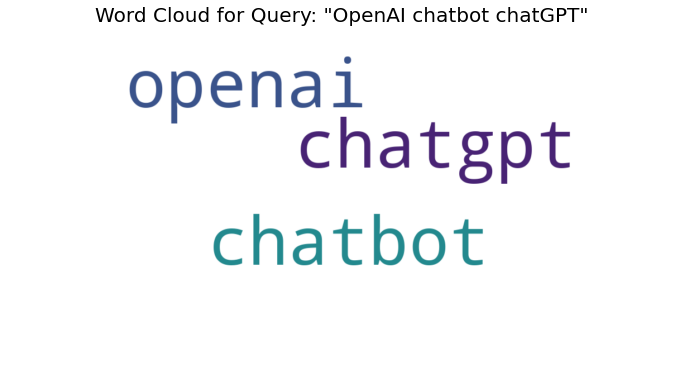

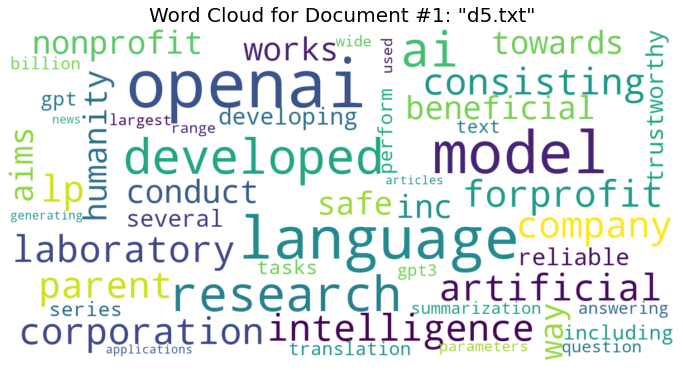

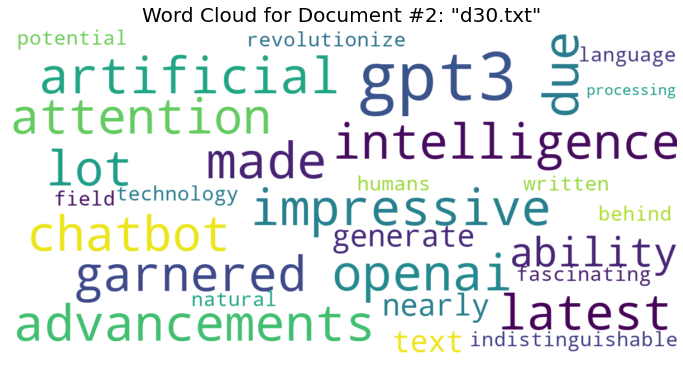

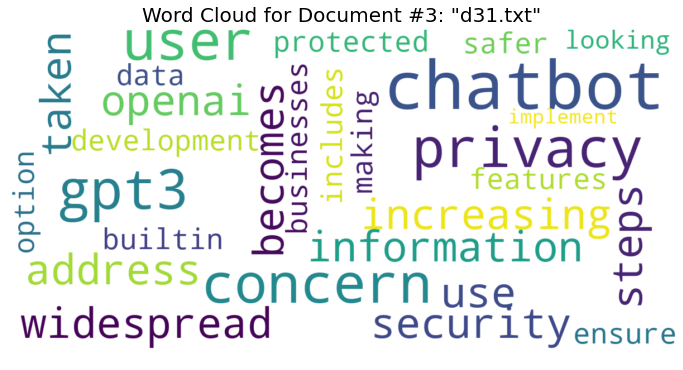

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to create a word cloud for a list of tokens
def create_wordcloud(tokens, title):
    wordcloud = WordCloud(background_color='white', max_words=50, max_font_size=40, scale=3, random_state=1).generate(' '.join(tokens))
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

# Create word cloud for query
query_tokens = clean_text(query)
create_wordcloud(query_tokens, f'Word Cloud for Query: "{query}"')

# Create word clouds for top-ranked documents
for i, doc in enumerate(ranked_docs[:3]):
    with open(os.path.join('documents', doc[0]), 'r') as f:
        text = f.read()
    doc_tokens = clean_text(text)
    create_wordcloud(doc_tokens, f'Word Cloud for Document #{i+1}: "{doc[0]}"')


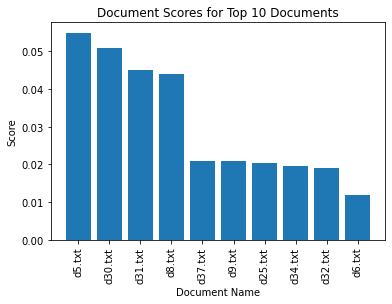

In [5]:
import matplotlib.pyplot as plt

def plot_doc_scores(ranked_docs, N=10):
    top_N = ranked_docs[:N]
    doc_names = [doc[0] for doc in top_N]
    scores = [doc[1] for doc in top_N]
    plt.bar(doc_names, scores)
    plt.title("Document Scores for Top {} Documents".format(N))
    plt.xlabel("Document Name")
    plt.ylabel("Score")
    plt.xticks(rotation=90)
    plt.show()

# Test the function
query = "OpenAI chatbot chatGPT"
ranked_docs = retrieve_and_rank(query)
plot_doc_scores(ranked_docs, N=10)


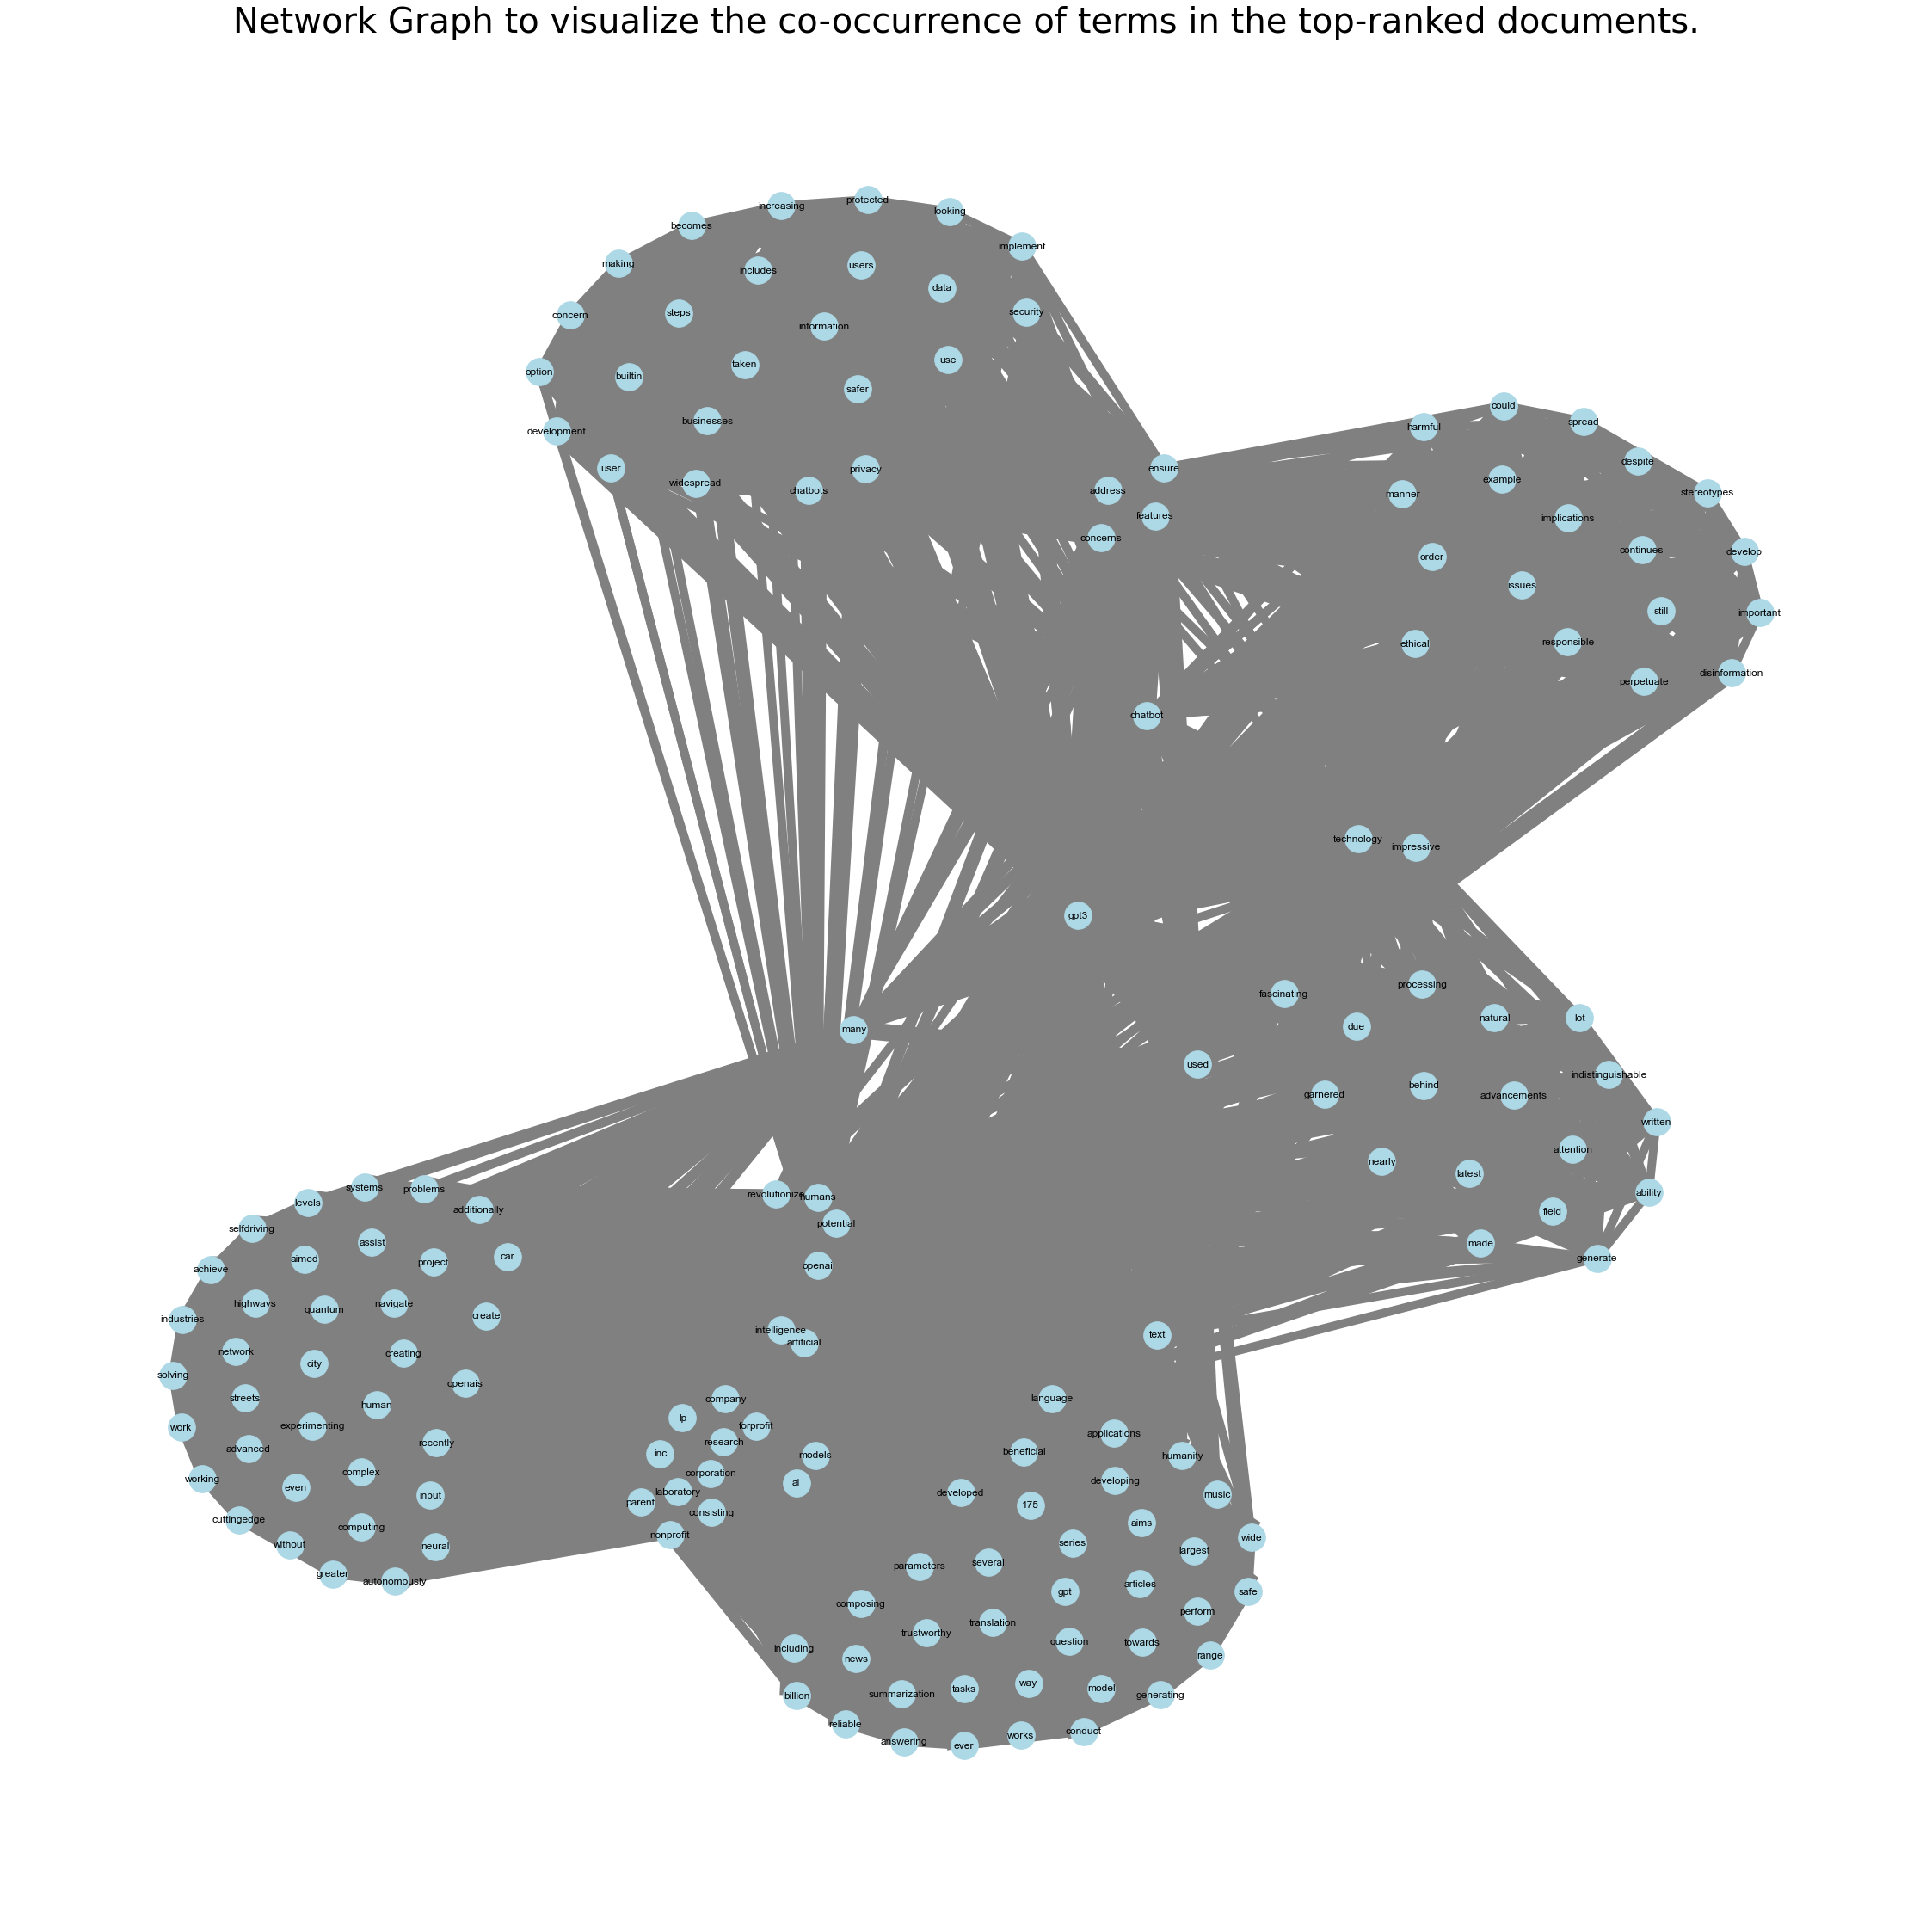

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

def create_network_graph(docs):
    # Create a graph
    G = nx.Graph()
    
    # Loop over documents
    for doc in docs:
        # Preprocess text and count term frequency
        text = clean_text(str(documents[doc]))
        tf = Counter(text)
        
        # Add nodes to graph
        for term in tf:
            if not G.has_node(term):
                G.add_node(term)
                
        # Add edges to graph
        for i, term1 in enumerate(tf):
            for j, term2 in enumerate(tf):
                if i < j:
                    if not G.has_edge(term1, term2):
                        G.add_edge(term1, term2, weight=0)
                    G[term1][term2]['weight'] += tf[term1] * tf[term2]
                        
    # Draw the graph
    fig, ax = plt.subplots(figsize=(40, 40)) # set figure size
    pos = nx.spring_layout(G, k=0.5)
    edge_widths = [d['weight']*10 for (u,v,d) in G.edges(data=True)]
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1000)
    nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=12, font_family='Arial')
    plt.axis('off')
    plt.title('Network Graph to visualize the co-occurrence of terms in the top-ranked documents.', fontsize=40)
    plt.show()

# Test the function
docs = [doc for doc, score in ranked_docs[:5]] # Top 5 ranked documents
create_network_graph(docs)
